In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('mobile_data (1).csv')
df.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,4.4


In [4]:
class LinearRegression:
    def __init__(self, alpha, epoch, epsilon):
        self.alpha = alpha
        self.epoch = epoch
        self.epsilon = epsilon
    def normalize(x):
        for cols in x.columns:
            x[cols] = (x[cols]-x[cols].min())/(x[cols].max() - x[cols].min())
        return np.array(x)
    def Linefit(self,x_train,y_train,x_test,y_test):
        x_train,x_test = LinearRegression.normalize(x_train), LinearRegression.normalize(x_test)
        x_train,x_test = np.insert(x_train,0,np.ones(len(x_train)),axis = 1), np.insert(x_test,0,np.ones(len(x_test)),axis = 1)
        w = np.ones((x_train.shape[1],1))
        y_test = np.array(y_test).reshape(len(y_test),1)
        y_train = np.array(y_train).reshape(len(y_train),1)
        for i in range(self.epoch):
            h = x_train@w
            grad = x_train.T@(h-y_train)
            w -= self.alpha*grad
            J = np.sum(np.square(h - y_train))/(2*len(x_train))
            
            if J < self.epsilon:
                break
        h_test = x_test @ w
        t_t_error = np.sum(np.square(h_test - y_test))/(2*len(x_test))
        r2 = r2_score(y_test, h_test)
        return w,J, t_t_error, r2

In [5]:
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]
print(X.shape,Y.shape)

(341, 10) (341,)


In [6]:
n = int(len(X)*80/100)
X_train, Y_train = X.loc[0:n], Y.loc[0:n]
X_test, Y_test = X.loc[n:len(X)], Y.loc[n:len(Y)]
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(273, 10) (69, 10) (273,) (69,)


In [7]:
model = LinearRegression(alpha = 0.001, epoch = 100000, epsilon = 0.0001)
w,j,error,r2 = model.Linefit(X_train,Y_train,X_test,Y_test)

/tmp/ipykernel_5293/2031508559.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[cols] = (x[cols]-x[cols].min())/(x[cols].max() - x[cols].min())


In [8]:
print('Cost Function: ',j)
print('Test Error: ', error)
print('r2 score: ',r2)

Cost Function:  0.05271409197455869
Test Error:  0.0633624210638536
r2 score:  -0.046987424721503634


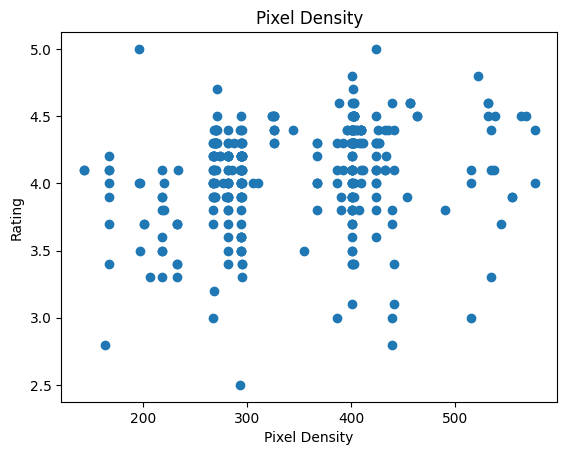

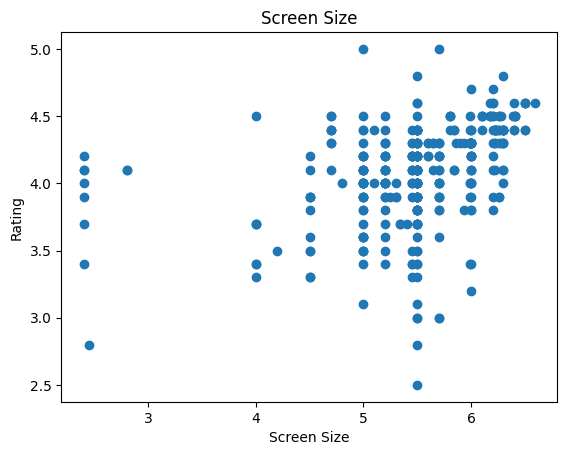

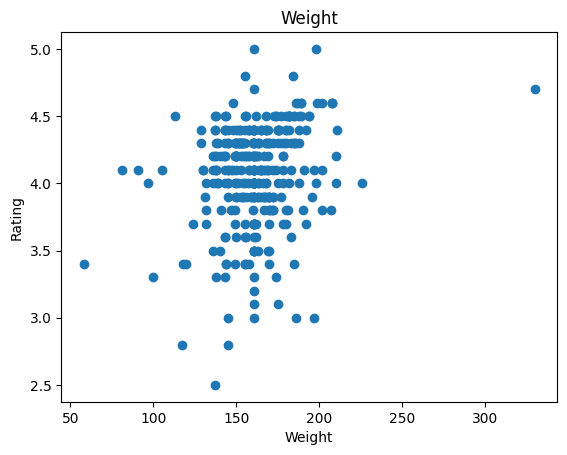

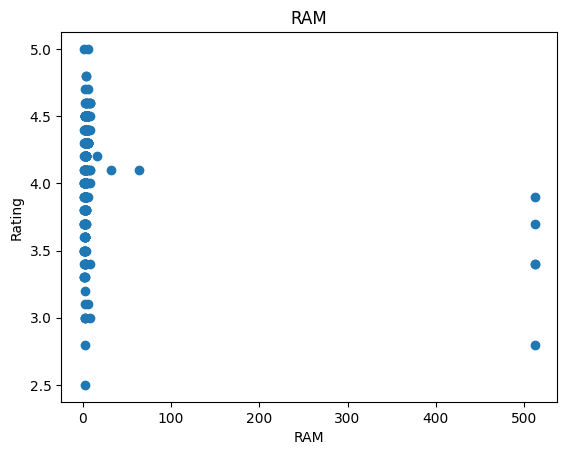

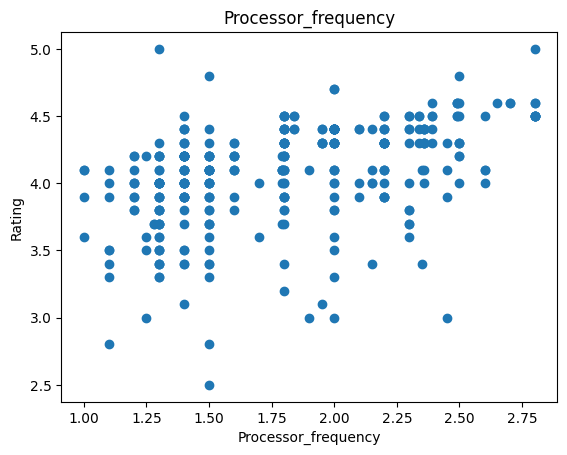

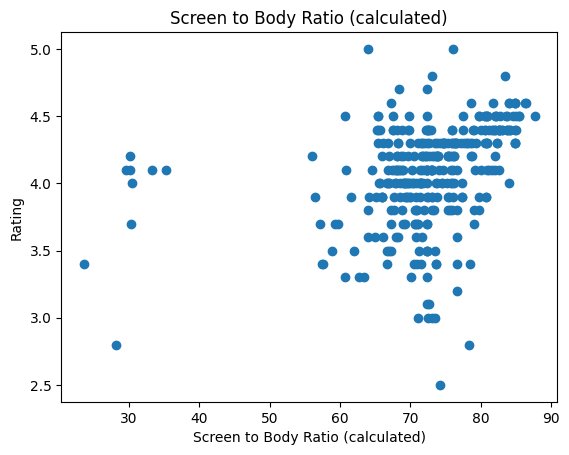

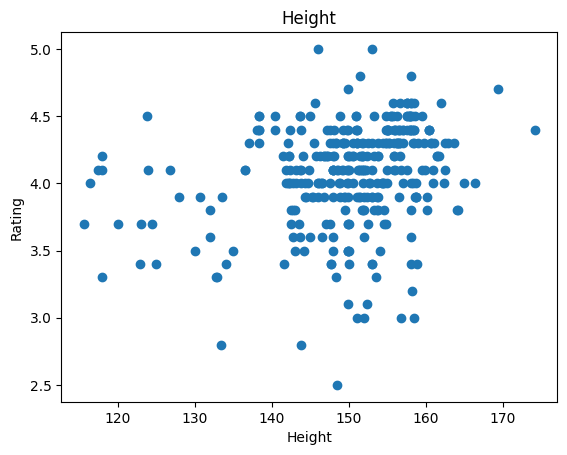

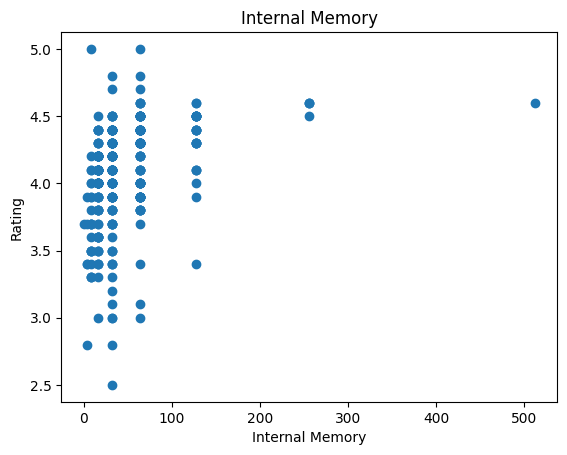

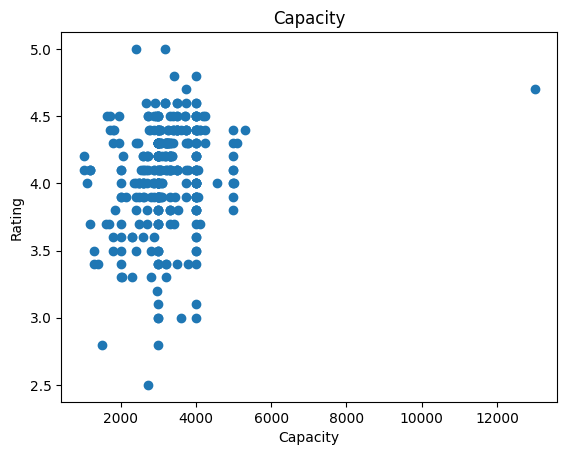

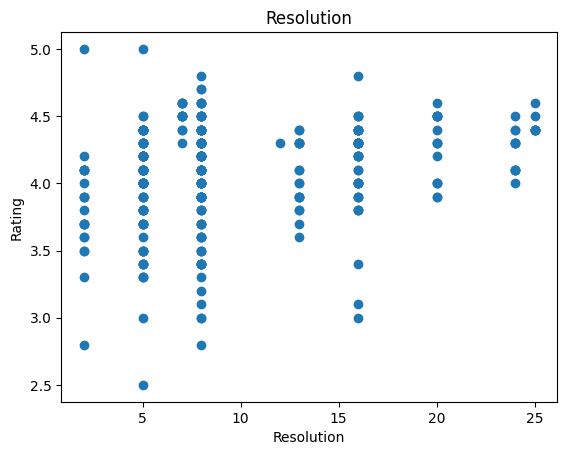

In [10]:
cols = df.columns
cols = cols[1:11]
for i in cols:
    plt.scatter(df[i], df['Rating'])
    plt.xlabel(i)
    plt.ylabel('Rating')
    plt.title(i)
    plt.show()

<b>Impact</b> : Pixel density, screen size, weight, processor_frequency, screen to body ratio, height <br>
<b>Little to no impact </b> : RAM, Internal memory, Capacity, Resolution